In [1]:
import pandas as pd
import numpy as np
import spacy
from pathlib import Path
import os
import sys
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import re
from pyvis.network import Network
import json

# Import custom functions
cwd = Path.cwd()
one_step_up = cwd.parent
two_steps_up = cwd.parents[1]
three_steps_up = cwd.parents[2]
util_path = str(two_steps_up)
sys.path.append(util_path)

from lib.utils.functions import *

### Get All Books in Witcher

In [6]:
# Put all books in a list and sort

cwd = Path.cwd()
bookdir = cwd / 'books'

# Traverse and get all names
p = Path(bookdir).glob('**/*')
booklist = [x for x in p if x.is_file()]
# booklist
booklist_smaller = booklist[0:8]
book_eight = booklist[7]

In [7]:
book_eight

PosixPath('/mnt/d/Algorant/witcher_nlp/series/Witcher/books/8 Something Ends Something Begins.txt')

In [8]:
booklist_smaller

[PosixPath('/mnt/d/Algorant/witcher_nlp/series/Witcher/books/1 The Last Wish.txt'),
 PosixPath('/mnt/d/Algorant/witcher_nlp/series/Witcher/books/2 The Sword of Destiny.txt'),
 PosixPath('/mnt/d/Algorant/witcher_nlp/series/Witcher/books/3 Blood of Elves.txt'),
 PosixPath('/mnt/d/Algorant/witcher_nlp/series/Witcher/books/4 Times of Contempt.txt'),
 PosixPath('/mnt/d/Algorant/witcher_nlp/series/Witcher/books/5 Baptism of Fire.txt'),
 PosixPath('/mnt/d/Algorant/witcher_nlp/series/Witcher/books/6 The Tower of the Swallow.txt'),
 PosixPath('/mnt/d/Algorant/witcher_nlp/series/Witcher/books/7 The Lady of the Lake.txt'),
 PosixPath('/mnt/d/Algorant/witcher_nlp/series/Witcher/books/8 Something Ends Something Begins.txt')]

### Load and Filter Characters

In [10]:
# Load Character dfs
charpath = cwd / 'characters'
characters = pd.read_csv(f"{charpath}/characters.csv")
# Remove brackets and text within brackets using regex
characters['character'] = characters['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))
# If name is split, ie Geralt of Rivia, get only first part
characters['character_firstname'] = characters['character'].apply(lambda x: x.split(' ', 1)[0])
# Make exception for "Two Tusks", because first name of "Two" causes problems
characters['character_firstname'] = characters['character_firstname'].replace(['Two'], 'Two Tusks')

### Iterate through all books and create graphs

In [7]:
books_graph = []
full_entitity_list = []

for book in booklist:
    book_text = textproc(book)
    print(f"Processing text for {book}")
    # Get list of entities per sentence
    sent_entity_df = get_sentence_entities(book_text)
    print(f"Getting Sentence entities...")
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, characters))
    
    # Filter out sentences that don't have character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    print(f"Filtering out non-characters...")
    # Take out first names
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                                  for item in x])
    # Create relationship df
    relationships = create_relationships(df = sent_entity_df_filtered, window_size = 5)
    print("Creating Relationships...")
    # Create network graph from df
    
    G = nx.from_pandas_edgelist(relationships,
                                source = "source",
                                target = "target",
                                edge_attr = "value",
                                create_using = nx.Graph())
    
    books_graph.append(G)
    print(f"Appending {book} graph...")

Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/1 The Last Wish.txt
Getting Sentence entities...
Filtering out non-characters...


/tmp/ipykernel_15572/717289017.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/1 The Last Wish.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/2 The Sword of Destiny.txt
Getting Sentence entities...
Filtering out non-characters...


/tmp/ipykernel_15572/717289017.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/2 The Sword of Destiny.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/3 Blood of Elves.txt
Getting Sentence entities...
Filtering out non-characters...


/tmp/ipykernel_15572/717289017.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/3 Blood of Elves.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/4 Times of Contempt.txt
Getting Sentence entities...
Filtering out non-characters...


/tmp/ipykernel_15572/717289017.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/4 Times of Contempt.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/5 Baptism of Fire.txt
Getting Sentence entities...
Filtering out non-characters...


/tmp/ipykernel_15572/717289017.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/5 Baptism of Fire.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/6 The Tower of the Swallow.txt
Getting Sentence entities...
Filtering out non-characters...


/tmp/ipykernel_15572/717289017.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/6 The Tower of the Swallow.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/7 The Lady of the Lake.txt
Getting Sentence entities...
Filtering out non-characters...


/tmp/ipykernel_15572/717289017.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/7 The Lady of the Lake.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/8 Something Ends Something Begins.txt
Getting Sentence entities...
Filtering out non-characters...
Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/8 Something Ends Something Begins.txt graph...


/tmp/ipykernel_15572/717289017.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


#### Attempt to Make Full List

In [11]:
books_graph = []
full_entitity_list = []

for book in booklist_smaller:
    book_text = textproc(book)
    print(f"Processing text for {book}")
    # Get list of entities per sentence
    sent_entity_df = get_sentence_entities(book_text)
    print(f"Getting Sentence entities...")
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, characters))
    
    # Filter out sentences that don't have character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    print(f"Filtering out non-characters...")
    # Take out first names
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                                  for item in x])
    # Append to Full List for Later Analysis
    print("Appending to full entitity list")
    full_entitity_list.append(sent_entity_df_filtered)
    
    # Create relationship df
    relationships = create_relationships(df = sent_entity_df_filtered, window_size = 5)
    print("Creating Relationships...")
    # Create network graph from df
    
    G = nx.from_pandas_edgelist(relationships,
                                source = "source",
                                target = "target",
                                edge_attr = "value",
                                create_using = nx.Graph())
    
    books_graph.append(G)
    print(f"Appending {book} graph...")

Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/1 The Last Wish.txt
Getting Sentence entities...
Filtering out non-characters...
Appending to full entitity list


/tmp/ipykernel_4705/4224418131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/1 The Last Wish.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/2 The Sword of Destiny.txt
Getting Sentence entities...
Filtering out non-characters...
Appending to full entitity list


/tmp/ipykernel_4705/4224418131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/2 The Sword of Destiny.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/3 Blood of Elves.txt
Getting Sentence entities...
Filtering out non-characters...
Appending to full entitity list


/tmp/ipykernel_4705/4224418131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/3 Blood of Elves.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/4 Times of Contempt.txt
Getting Sentence entities...
Filtering out non-characters...
Appending to full entitity list


/tmp/ipykernel_4705/4224418131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/4 Times of Contempt.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/5 Baptism of Fire.txt
Getting Sentence entities...
Filtering out non-characters...
Appending to full entitity list


/tmp/ipykernel_4705/4224418131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/5 Baptism of Fire.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/6 The Tower of the Swallow.txt
Getting Sentence entities...
Filtering out non-characters...
Appending to full entitity list


/tmp/ipykernel_4705/4224418131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/6 The Tower of the Swallow.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/7 The Lady of the Lake.txt
Getting Sentence entities...
Filtering out non-characters...
Appending to full entitity list


/tmp/ipykernel_4705/4224418131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/7 The Lady of the Lake.txt graph...
Processing text for /mnt/d/Algorant/witcher_nlp/series/Witcher/books/8 Something Ends Something Begins.txt
Getting Sentence entities...
Filtering out non-characters...
Appending to full entitity list
Creating Relationships...
Appending /mnt/d/Algorant/witcher_nlp/series/Witcher/books/8 Something Ends Something Begins.txt graph...


/tmp/ipykernel_4705/4224418131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [12]:
len(full_entitity_list)

8

#### Relationship Tree for All Books Combined

In [13]:
# Full List as One DF
all_witcher_entities = pd.concat(full_entitity_list)
all_witcher_entities

,sentence,entities,character_entities
2,"(\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...",[Geralt],[Geralt]
6,"(Damned, mother's-, !, ', \n\n, ', Careful, ,,...","[Velerad, Ostrit]","[Velerad, Ostrit]"
7,"(', Say, what, you, want, about, the, striga, ...",[Adda],[Adda]
10,"(Segelin, and, Ostrit, looked, at, each, other...","[Segelin, Ostrit]","[Segelin, Ostrit]"
15,"(And, then, ,, ', interrupted, Velerad, ,, ', ...","[Velerad, miller]",[Velerad]
...,...,...,...
719,"(Geralt, and, Yennefer, had, known, Loot, -, P...","[Geralt, Yennefer, Loot-Pat]","[Geralt, Yennefer]"
721,"(It, was, evidently, Dandelion, 's, work, ., \n)",[Dandelion],[Dandelion]
722,"("", Welcome, ,, Vissing, ,, "", said, the, sorc...",[Vissing],[Vissing]
730,"(Ah, ,, I, 'm, so, pleased, ,, Geralt, ,, and,...","[Geralt, Yennefer]","[Geralt, Yennefer]"


In [15]:
all_witcher_entities = all_witcher_entities.reset_index(drop=True)
relationships = create_relationships(df = all_witcher_entities, window_size = 5)
G = nx.from_pandas_edgelist(relationships,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

,sentence,entities,character_entities
0,"(\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...",[Geralt],[Geralt]
1,"(Damned, mother's-, !, ', \n\n, ', Careful, ,,...","[Velerad, Ostrit]","[Velerad, Ostrit]"
2,"(', Say, what, you, want, about, the, striga, ...",[Adda],[Adda]
3,"(Segelin, and, Ostrit, looked, at, each, other...","[Segelin, Ostrit]","[Segelin, Ostrit]"
4,"(And, then, ,, ', interrupted, Velerad, ,, ', ...","[Velerad, miller]",[Velerad]
...,...,...,...
10080,"(Geralt, and, Yennefer, had, known, Loot, -, P...","[Geralt, Yennefer, Loot-Pat]","[Geralt, Yennefer]"
10081,"(It, was, evidently, Dandelion, 's, work, ., \n)",[Dandelion],[Dandelion]
10082,"("", Welcome, ,, Vissing, ,, "", said, the, sorc...",[Vissing],[Vissing]
10083,"(Ah, ,, I, 'm, so, pleased, ,, Geralt, ,, and,...","[Geralt, Yennefer]","[Geralt, Yennefer]"


#### Kamada Graph

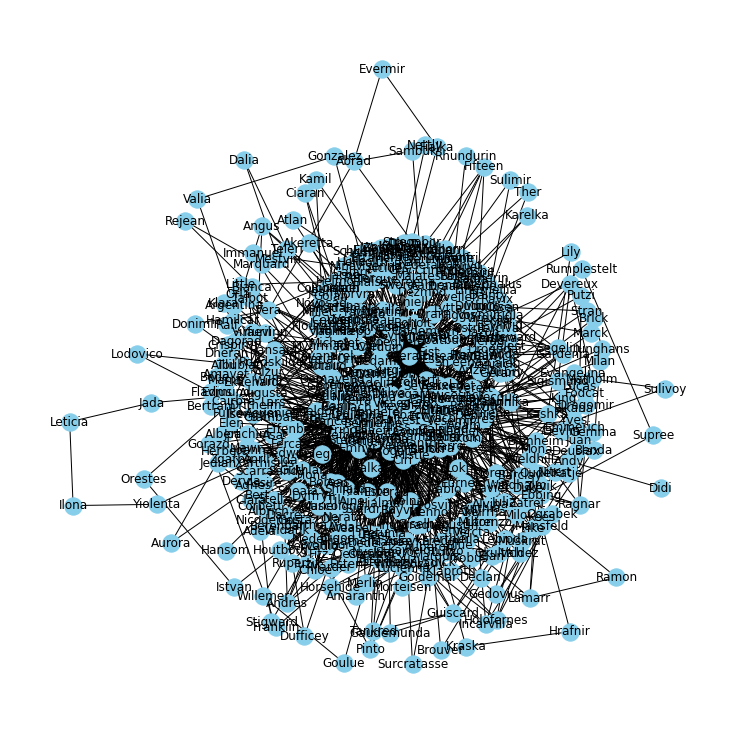

In [20]:
plt.figure(figsize=(10,10))
# pos = nx.kamada_kawai_layout(G)
pos = nx.kamada_kawai_layout(G)

nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

#### PyVis Graph

In [21]:
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

# Make node size relative
node_degree = dict(G.degree)

# Setting up node size
nx.set_node_attributes(G, node_degree, "size")

# Pass in networkx Graph G
net.from_nx(G)
net.show("witcher.html")

#### Louvain Community Detection Graph

In [22]:
communities = community_louvain.best_partition(G)

In [23]:
nx.set_node_attributes(G, communities, 'group')

In [24]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#00000F', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

### Plotting Character Importance Over Time

<AxesSubplot:>

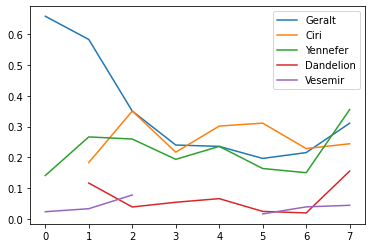

In [8]:
evol = [nx.degree_centrality(book) for book in books_graph]
degree_evol_df = pd.DataFrame.from_records(evol)
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()

### Making Community Graph Per Book

In [9]:
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

# Make node size relative
node_degree = dict(books_graph[0].degree)

# Setting up node size
nx.set_node_attributes(G, node_degree, "size")

# Pass in networkx Graph G
net.from_nx(G)
net.show("witcher.html")

### Save Book Graphs and Combined Graph

In [26]:
nx.write_gpickle(books_graph, "witcher_book_graphs.gpickle")
# G = nx.read_gpickle("test.gpickle")
nx.write_gpickle(G, "witcher_combined.gpickle")

### Read Graph

In [28]:
G = nx.read_gpickle('witcher_book_graphs.gpickle')
G_full = nx.read_gpickle('witcher_combined.gpickle')

### Misc

#### It's took big, need to split up the text

In [10]:
# Create splitter for pipeline
book_path = bookdir / 'Witcher_All_Books.txt'
book_text = open(book_path).read()
split_text = [book_text[i:i+800000] for i in range(0, len(book_text), 800000)]
len(split_text)

7

In [14]:
from spacy.tokens import Doc

docs = []
for chunk in split_text:
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(chunk)
    docs.append(doc)
merged = Doc.from_docs(docs)

ValueError: [E999] Unable to merge the Doc objects because they do not all share the same `Vocab`.

In [ ]:
from spacy.tokens import Doc
docs = list(nlp.pipe(split_text))
merged = Doc.from_docs(docs)

In [20]:
def textproc_large(filename):
    nlp = spacy.load('en_core_web_sm')
    nlp.max_length = 5000000
    book_text = open(filename).read()
    book_doc = nlp(book_text)
    
    return book_doc

def allbookproc(book):
    book_graph = []
    
    book_text = textproc_large(book)
    print(f"Processing text for {book}")
    # Get list of entities per sentence
    sent_entity_df = get_sentence_entities(book_text)
    print(f"Getting Sentence entities...")
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, characters))
    
    # Filter out sentences that don't have character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    print(f"Filtering out non-characters...")
    # Take out first names
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                                  for item in x])
    # Create relationship df
    relationships = create_relationships(df = sent_entity_df_filtered, window_size = 5)
    print("Creating Relationships...")
    # Create network graph from df
    
    G = nx.from_pandas_edgelist(relationships,
                                source = "source",
                                target = "target",
                                edge_attr = "value",
                                create_using = nx.Graph())
    
    books_graph.append(G)
    print(f"Appending {book} graph...")

In [ ]:
book_path = bookdir / 'Witcher_All_Books.txt'

allbookproc(book_path)

In [13]:

book_path

PosixPath('/mnt/d/Algorant/witcher_nlp/series/Witcher/books/Witcher_All_Books.txt')